# Small Scale Fading

_Note: Unless there is possible confusion with large-scale fading we shall refer to small-scale fading as fading itself._

Fading is the rapid variation of the received signal level in the short term as the user terminal moves a short distance. It is due to the effect of multiple signal paths, which cause interference when they arrive subsequently in the receive antenna with varying phases (i.e., constructive interference with the same phase and destructive interference with a different phase). 

Thus, we may notice three main effects:

* Rapid changes in signal strength over a small travel distance or time interval
* Random frequency modulation due to varying Doppler shifts on different multipath signals
* Time dispersion caused by multipath propagation delays

Factors affecting fading include:

* mobile speed: Doppler shifts
* speed of surrounding objects
* multipath propogation: reflections from other objects
* transmission bandwidth of signal: The received signal will be distorted if the transmission bandwidth is greater than the bandwidth of the multipath channel.

## Parameters for small scale fading

How do we characterise this fading? Well, we usually look at a power delay profile (PDP) which is a table of delays versus their average powers. The average power is often calculated in relation to the first received signal, called the tap. So the average power of the tap in decibels would be 0 (by construction).

_Mean excess delay_ and _RMS delay spread_ are useful channel parameters that provide a reference of comparison among the different multipath fading channels, and furthermore, show a general guideline to design a wireless transmission system. 

Let $\tau_k$ denote the denote the channel delay of the kth path while $a_k$ and $P(\tau_k)$ denote the amplitude and power, respectively. Then, the **Mean excess delay** $\overline{\tau}$ is given by the first moment of PDP as:

\begin{align*}
\overline{\tau} &= \frac{\sum_k a_k^2 \tau_k}{\sum_k a_k^2} &= \frac{\sum_k P(\tau_k) \tau_k}{\sum_k P(\tau_k)}
\end{align*}

Meanwhile, **RMS delay spread** $\sigma_{\tau}$ is given by the square root of the second central moment of PDP as:

$$ \sigma_{\tau} = \sqrt{\overline{\tau^2} - \overline{\tau}^2}$$,

with, 

\begin{align*}
\overline{\tau^2} &= \frac{\sum_k a_k^2 \tau_k^2}{\sum_k a_k^2} &= \frac{\sum_k P(\tau_k) \tau_k^2}{\sum_k P(\tau_k)}
\end{align*}

We also define the **coherence bandwidth** $B_c := 1/\sigma_{\tau}$. Technically, this depends on the definition of coherence bandwidth, for instance, in the case where the coherence bandwidth is defined as a bandwidth with correlation of 0.9 or above, we get:

$$B_c := \frac{1}{50\sigma_{\tau}}$$

## Time Dispersive versus Frequency Dispersive Fading

As noted earlier, fading can be caused by both multi-path propogation or the Doppler effect. The former induces time dispersive fading, while the latter induces frequency dispersive fading. Depending on the extent of time dispersion or frequency dispersion, the frequency-selective fading or time-selective fading is induced respectively.

### Frequency-Selective Fading Channel

Due to time dispersion, a transmit signal may undergo fading over a frequency domain either in a selective or non-selective manner, which is referred to as _frequency-selective fading_ or _frequency-non-selective fading_ respectively. For the given channel frequency response, frequency selectivity is generally governed by signal bandwidth.

One can think of this as a transfer function being acted upon the signal $x(t)$ by $h(t,\tau)$ to produce $y(t)$.

![Intuitive fig](intuit_freq.png)

Intuitively, if the signal bandwidth is narrow enough, we may transmit it over the flat region of the transfer function. In the time domain, this means $\tau << T_s$ . One may also observe that this essentially means that ISI (inter-symbol interference) is not significant. We capture this in figure 1.

To summarise, this requires $B_s << B_c$ or $T_s >> \sigma_{\tau}$.

On the other hand if $B_s > B_c$ or $\sigma_{\tau} > 0.1T_s$, then we cannot make the former assumption. ISI occurs due the symbol duration being much shorter than the multipath delay spread. Owing to the condition, we often call it a wide band channel.

## Time-Selective Fading Channel


Depending on the extent of the Doppler spread, the received signal undergoes fast or slow fading. In a fast fading channel, the coherence time is smaller than the symbol period and thus, a channel impulse response quickly varies within the symbol period. Variation in the time domain is closely related to movement of the transmitter or receiver, which incurs a spread in the frequency domain, known as a Doppler shift.

Let $f_m$ be the maximum Doppler shift. The bandwidth of Doppler spectrum,denoted as $B_d$,is given as $B_d = 2f_m$.In general,the coherence time, denoted as $T_c := \frac{1}{f_m}$, is inversely proportional to Doppler spread.

Therefore, $T_s > T_c$ implies $B_s < B_d$ , which is the condition for fast fading.

But if the Doppler spread is much smaller than the bandwidth of the baseband transmit signal, we get slow fading, ie..., $T_s << T_c, B_s >> B_c$.

Note, if we were to define coherence with a correlation of 0.5, then $T_c$ would be defined as:

$$ T_c := \frac{9}{16\pi f_m}$$

In order to account for both scenarios, we often just take the geometric mean between the two as the definition. Hence,


$$ T_c := \sqrt{\frac{9}{16\pi f_m^2}} = \frac{0.423}{f_m} $$

## Statistical Modelling

Finally, armed with the parameters from the preceeding two sections, we can describe a statistical model for fading.

Consider a plane wave arriving from angle $\theta$ with respect to the direction of a terminal movement with a speed of $v$, where all waves are arriving from a horizontal direction on $x-y$ plane. This is depicted in figure 2.

![Stat Modelling](planewave.png)

As a mobile station moves, all planewaves arriving at the receiver undergo the Doppler shift. Let $x(t)$ be a baseband transmit signal. Then, the corresponding passband transmit signal is given as:

$$ \tilde{x}(t) = Re[x(t)\exp(j2\pi f_c t)]$$

Passing through a scattered channel of $I$ different propagation paths with different Doppler shifts, the passband received signal can be represented as:

\begin{align*}
\tilde{y}(t) &= Re[\sum_{i=1}^I C_i x(t-\tau_i) \exp(j2\pi (f_c + f_i) t)] \\
&= Re[y(t) \exp(j2\pi f_c t)] \\
\end{align*}

where, $C_i, t_i$, and $f_i$ denote the channel gain, delay, and Doppler shift for the ith propagation
path, respectively. For the mobile speed of $v$ and the wavelength of $l$, Doppler shift is given as:

$$f_i = f_m \cos \theta_i = \frac{v}{\lambda} \cos \theta_i$$

where $f_m$ is the maximum Doppler shift and $\theta_i$ is the angle of arrival (AoA) for the ith planewave. Note that the baseband received signal is given as:

$$y(t) = \sum_{i=1}^I C_i \exp(-j\phi (t)) x(t-\tau_i) \quad \text{where, } \phi(t) = 2\pi ((f_c+f_i)\tau_i -f_it_i)$$

We can model this by the transfer function:


$$h(t,\tau) = \sum_{i=1}^I C_i \exp(-j\phi (t)) \delta (t-\tau_i)$$, with $\delta(.)$ as the Dirac-delta function.

If $\tau_i << T_s$, we can approximate it as $\overline{\tau}$, thus:

$$h(t,\tau) = h(t) \delta (t-\overline{\tau})$$

Hence,

$$\tilde{y}(t) = h_I(t) \cos 2\pi f_ct - h_Q(t)\sin 2\pi f_ct$$, where $h_I(t)$ and $h_Q(t)$ are the inphase and quadrature components of $h(t)$ respectively, given as:

$$h_I(t) = \sum_i C_i \cos \phi_i(t), h_Q(t) = \sum_i C_i \sin \phi_i(t) $$.


## Central Limit Theorem

We now make use of the central limit theorem, which is a variant of the law of large numbers. In essense, it states that if we were to add a sufficiently number of _normalised_ random quantities (formally random variables, provided independent), we would get a gaussian distribution.

Formally,

$$\sum_{i=1}^n Z_i \to^{\text{in dist}} \mathcal{N}(0,1) \quad \text{where, } Z_i = \frac{X_i - \mu_i}{\sigma_i}$$

In figure 3, which is an empirical verification of the Central Limit Theorem, notice how closely the gaussian approxmiates the normalised sum. In practice, we can safely assume the central limit theorem for summands greater than 30 in number. Provided they are independent.

/Users/Ankivarun/anaconda3/envs/torch37/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


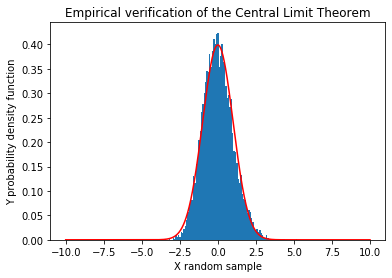

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
%matplotlib inline 

# Bunch of RVs
ss1 = np.random.uniform(1, 3, 10000)
ss2 = np.random.normal(1, 0.1, 10000)
ss3 = np.random.beta(0.1, 1, 10000)
ss4 = np.random.binomial(10, 0.1, 10000)
ss4 = np.random.chisquare(4, 10000)
ss5 = np.random.exponential(1.0, 10000)
ss6 = np.random.uniform(1, 4, 10000)
ss7 = np.random.normal(1, 0.1, 10000)
ss8 = np.random.beta(0.44, 1, 10000)
ss9 = np.random.binomial(10, 0.1, 10000)
ss10 = np.random.chisquare(4, 10000)
ss11 = np.random.exponential(1.0, 10000)

ss = np.array([ss1, ss2, ss3, ss4, ss5, ss6, ss7, ss8, ss9, ss10, ss11])
z = np.sum(ss, axis=0)

# Plot normalised sum
ss_norm = np.array([(s - np.mean(s)) / np.std(s) for s in ss])
z_norm = np.sum(ss_norm, axis=0)
z_norm = (z_norm - np.mean(z_norm)) / np.std(z_norm)

count, bins, ignored = plt.hist(z_norm, 100, normed=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
xx = np.linspace(-10, 10, 10000)
# print(xx)
gauss = 1 / np.sqrt(2 * np.pi) * np.exp(-(xx) ** 2 / 2)
# print(gauss)

plt.plot(xx, gauss, "r")
plt.xlabel("X random sample")
plt.ylabel("Y probability density function")
plt.title("Empirical verification of the Central Limit Theorem")
plt.show()

## Rayleigh Fading

Now observe that if $I > 30$ we can assume CLT, hence, $h_I$ and $h_Q$ would be normally distributed.

Thus, the amplitude of $\tilde{y}(t) = \sqrt{h_I^2(t) + h_Q^2(t)}$ follows the Rayleigh distribution.

Meanwhile, if some of the scattering components are much stronger than most of the components, the fading process no longer follows the Rayleigh distribution, rather the  Rician distribution and thus, this fading process is referred to as Rician fading.

The strongest scattering component usually corresponds to the line-of-sight (LOS) component (also referred to as specular components). This is modelled by the Rician distribution. Other than the LOS component, all the other components are non-line-of-sight (NLOS) components (referred to as scattering components), and are modelled by the Rayleigh distribution.

Thus, $y = c + W_1 + W_2j$, with $W_1, W_2$ modelled as iid Gaussians of mean 0, variance $\sigma^2$, $c$ represents the LOS component.

It has been observed that the $y$ is a Rician variable with:

$$ f_Y(y) = \frac{y}{\sigma^2} \exp(-\frac{y^2 + c^2}{\sigma^2})J_o(yc/\sigma^2)$$

, where $J_o$ is the bessel function of the first kind.

## Exercise

In the previous section, we modelled Line of Sight (LOS) by Rician and NLOS by Rayleigh. Now weigh LOS by $K [dB]$ in a linear fashion ($\frac{K}{K+1},\frac{1}{K+1}$). 

Show that for $K> 15dB$, the mixture looks Gaussian and for $K<-40dB$, it looks like a Rayleigh distribution. 

We have some starter code to get you started.


Note: In the language of statistics, we call this property as convergence in distribution. There are also definitions for convergence in probability and almost surely convergence. We shall refer the interested reader to given references for this.

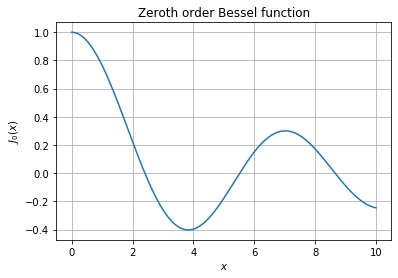

In [8]:
from scipy.special import jv

arr = np.linspace(0,10,1000)

# Zeroth order Bessel function
J_0 = jv(0,arr)

plt.plot(arr,J_0)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$J_0(x)$")
plt.title("Zeroth order Bessel function")
plt.show()

## References

1. MIMO OFDM Wireless Communications, Y. Chang and W. Yang, IEEE Press, 2010.
2. [Convergence in Probability](https://www.statlect.com/asymptotic-theory/convergence-in-probability)
3. [Scipy Docs: Bessel functions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv)